<a href="https://colab.research.google.com/github/CesarData/Probabilidad-y-estadistica/blob/main/Modelos_probabilisticos_Entregable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Tecnológica de México**

## **Ingeniería en Ciencia de Datos**

### **Modelos probabilísticos**

### Entregable 2

### Prof. Dr. Eduardo Orduña Jaramillo

#### César Agustín González Ortiz

#### Matrícula 340029038

3 de diciembre de 2023


1. [Distribución binomial](#binomial)

2. [Distribución hipergeométrica](#hipergeometrica)

3. [Distribución de Poisson](#poisson)

## **Carga de librerías**

In [1]:
from scipy.stats import binom
from scipy.stats import hypergeom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## **1. Distribución binomial** <a name="binomial"></a>

Un fabricante de cristalería sabe que el 10% de sus copas tienen alguna imperfección estética por lo que se clasifican como artículos de segunda. Calcular las siguientes probabilidades:

1. Entre 10 copas seleccionas una sea de segunda.
2. Entre 10 copas hay un máximo de 2 de segunda.
3. Entre 10 copas seleccionadas al menos 3 sean de segunda.


In [2]:
n = 10
p = 0.1
x = np.arange(0, n+1)

mean, var, skew, kurt = binom.stats(n, p, moments = 'mvsk')

df_b = pd.DataFrame({
       'Media' : mean,
       'Varianza': var,
       'Desviación estándar': np.sqrt(var),
       'Sesgo': skew,
       'Curtosis': kurt,
       'Límite inferior': mean - (2 * np.sqrt(var)),
       'Límite superior': mean + (2 * np.sqrt(var)),
}, index=[0])
df_b.transpose( )

,0
Media,1.000000
Varianza,0.900000
Desviación estándar,0.948683
Sesgo,0.843274
Curtosis,0.511111
Límite inferior,-0.897367
Límite superior,2.897367


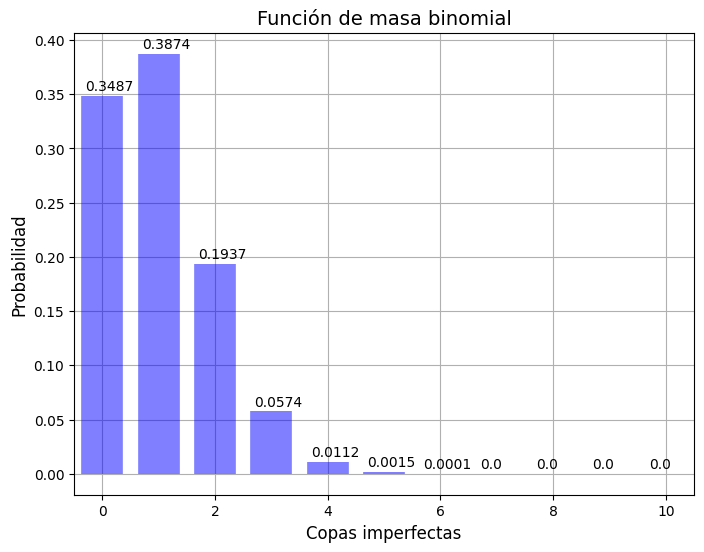

In [3]:
bin = binom.pmf(x,n,p)

plt.figure(figsize=(8,6))

plt.title(r"Función de masa binomial", fontsize = 14)
plt.xlabel("Copas imperfectas", fontsize = 12)
plt.ylabel("Probabilidad", fontsize = 12)

plt.vlines(x, 0, bin, colors = 'b', lw = 30, alpha = 0.5)
for i in x:
  plt.text(x[i]-0.3, bin[i]+0.005, round(bin[i], 4))
plt.grid(True)
plt.show()

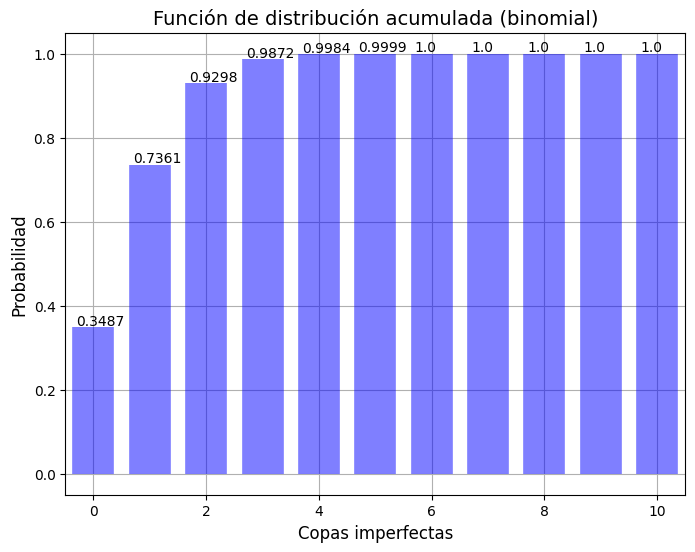

In [4]:
bin = binom.cdf(x,n,p)

plt.figure(figsize=(8,6))

plt.title(r"Función de distribución acumulada (binomial)", fontsize = 14)
plt.xlabel("Copas imperfectas", fontsize = 12)
plt.ylabel("Probabilidad", fontsize = 12)

plt.vlines(x, 0, bin, colors = 'b', lw = 30, alpha = 0.5)
for i in x:
  plt.text(x[i]-0.3, bin[i]+0.005, round(bin[i], 4))
plt.grid(True)
plt.show()

Las gráficas serán útiles para responder a los incisos:<br><br>

1. Entre 10 copas seleccionas una sea de segunda.<br><br>

<center>$p(1;10,0.1)≈0.3874$</center><br><br>

2. Entre 10 copas hay un máximo de 2 de segunda.<br><br>

<center>$p(x≤2;10,01)≈0.9298$</center><br><br>

3. Entre 10 copas seleccionadas al menos 3 sean de segunda.<br><br>

  <center>$p(x≥3;10,0.1) =1- \sum_{i = 0}^2 p(i; 10, 0.1)=1-0.9298≈0.0702$</center><br><br>


Parece ser que el rango habitual de imperfecciones está entre 0 y 2 por cada 10 copas revisadas. Mayor cantidad de copas defectuosas requiere una revisión de las condiciones del equipo para determinar por qué ha aumentado el número de defectos. El sesgo es positivo lo que quiere decir, como podemos corroborar en la gráfica, que hay una cola más larga a la derecha. La curtosis también es positiva, es leptocúrtica ya que es más puntiaguda comparada con la campana de Gauss de las distribuciones normales.

## **2. Distribución hipergeométrica** <a name="hipergeometrica"></a>

Se quiere conformar la mesa directiva de un colegio que debe estar compuesta por 12 padres de familia seleccionados aleatoriamente. Sólo uno de los padres de cada niño puede registrarse. Al final del registro existen 262 mujeres registradas y 81 hombres. La mesa directiva queda conformada por 3 mujeres y 9 hombres. Sin embargo, las mujeres argumentan que la selección estuvo sesgada. Calculemos la probabilidad y analicemos los datos para comprobar si esta afirmación es verdadera o falsa.

In [5]:
[M, n, N] = [343, 12, 262]
hg = hypergeom(M, n, N)
x = np.arange(0, n+1)

mean, var, skew, kurt = hg.stats(moments = 'mvsk')

df_h = pd.DataFrame({
       'Media' : mean,
       'Varianza': var,
       'Desviación estándar': np.sqrt(var),
       'Sesgo': skew,
       'Curtosis': kurt,
       'Límite inferior': mean - (2 * np.sqrt(var)),
       'Límite superior': mean + (2 * np.sqrt(var)),
}, index=[0])
df_h.transpose( )

,0
Media,9.166181
Varianza,2.094986
Desviación estándar,1.447407
Sesgo,-0.341060
Curtosis,-0.048128
Límite inferior,6.271367
Límite superior,12.060994


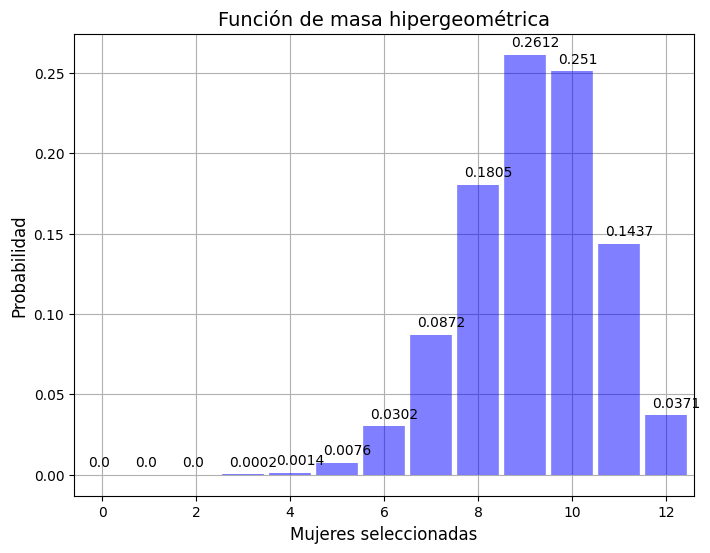

In [6]:
y = hg.pmf(x)

plt.figure(figsize=(8,6))

plt.title(r"Función de masa hipergeométrica", fontsize = 14)
plt.xlabel("Mujeres seleccionadas", fontsize = 12)
plt.ylabel("Probabilidad", fontsize = 12)

plt.vlines(x, 0, y, colors = 'b', lw = 30, alpha = 0.5)
for i in x:
  plt.text(x[i]-0.3, y[i]+0.005, round(y[i], 4))
plt.grid(True)
plt.show()

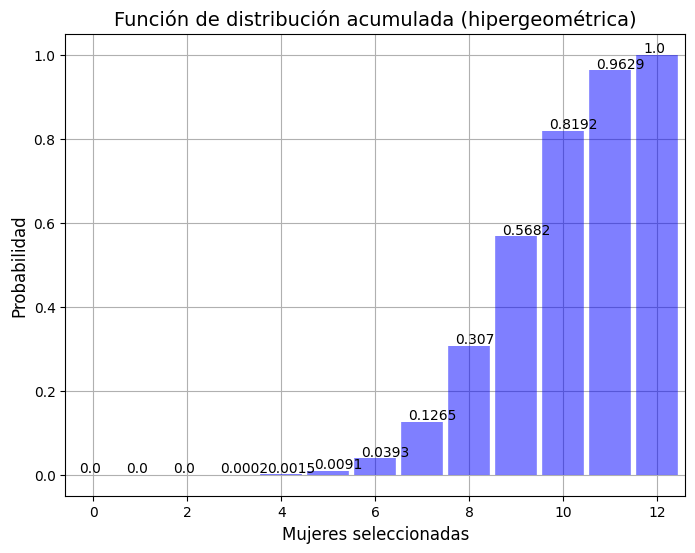

In [7]:
y=hg.cdf(x)

plt.figure(figsize=(8,6))

plt.title(r"Función de distribución acumulada (hipergeométrica)", fontsize = 14)
plt.xlabel("Mujeres seleccionadas", fontsize = 12)
plt.ylabel("Probabilidad", fontsize = 12)

plt.vlines(x,0,y, colors = 'b', lw = 30, alpha = 0.5)
for i in x:
  plt.text(x[i]-0.3, y[i]+0.005, round(y[i], 4))
plt.grid(True)
plt.show()

Tenemos un valor esperado de 9 con desviación estándar de cerca de 1.5 lo que nos indica que la concentración de la probabilidad está entre 7.5 y 10.5. Sin duda la cantidad de mujeres que integran la mesa directiva es cuando menos sospechosa. Los límites de la regla práctica del rango también lo confirman. Nos señalan que los valores más habituales para que las mujeres formen parte de la dirección son entre 7 y 12. Naturalmente esto no quiere decir que sea imposible una selección menor del número de mujeres para la mesa directiva, pero si improbables. En la gráfica de función de masa vemos que incluso 6 mujeres, siendo flexibles con el resultado, podrían formar parte de la mesa, pero valores menores son muy improbables y disminuyen cuando la cantidad de mujeres es menor así que las 3 que conforman la dirección son prácticamente imposibles si la selección aleatoria. Sin duda debe repetirse el proceso de selección por que el sesgo parece evidente.<br><br>

Finalmente enfatizar lo que ya muestran las gráficas. El sesgo es negativo por lo que hay una cola más prolongada hacia la izquierda y tiene una curtosis ligeramente platicúrtica (negativa) indicando así ser más plana que una distribución normal y mayor dispersión de probabilidad, es decir, más alejamiento del valor esperado.

## **3. Distribución de Poisson** <a name="poisson"></a>

Pasemos al ejemplo. Supongamos que en una maquiladora de tarjetas electrónicas 1 de cada 200 presenta algún defecto. Tenemos un lote de 1,000 tarjetas del cual debemos calcular las siguientes probabilidades:

1.	Existan 4 tarjetas defectuosas.
2.	Haya entre 5 y 8 tarjetas defectuosas.
3.	Cuando menos 7 estén defectuosas.


Lo primero es determinar el valor de λ que se calcula de la siguiente manera:<br><br>

<center> $\lambda= {1000\over200}=5$</center><br><br>

Tenemos 5 defectos por cada 1,000 tarjetas electrónicas. Con este valor vamos a calcular las medidas.

In [8]:
mu = 5
n = 10
x = np.arange(0, n+1)

mean, var, skew, kurt = poisson.stats(mu, moments = 'mvsk')

df_p = pd.DataFrame({
       'Media' : mean,
       'Varianza': var,
       'Desviación estándar': np.sqrt(var),
       'Sesgo': skew,
       'Curtosis': kurt,
       'Límite inferior': mean - (2 * np.sqrt(var)),
       'Límite superior': mean + (2 * np.sqrt(var)),
}, index=[0])
df_p.transpose( )

,0
Media,5.000000
Varianza,5.000000
Desviación estándar,2.236068
Sesgo,0.447214
Curtosis,0.200000
Límite inferior,0.527864
Límite superior,9.472136


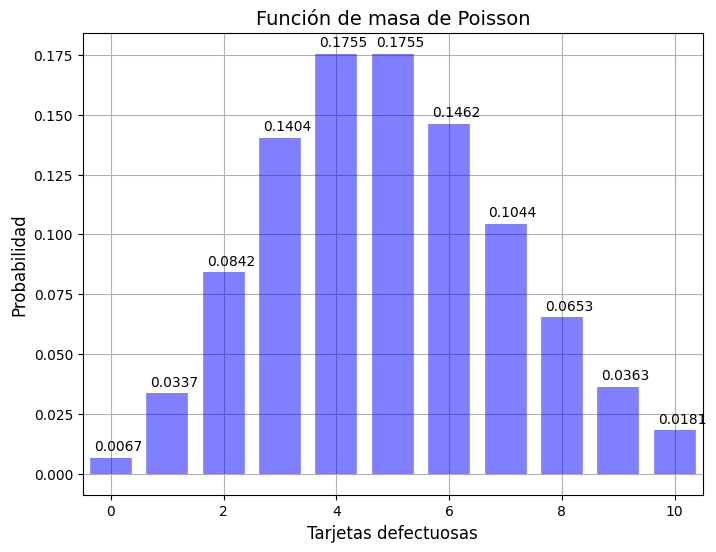

In [9]:
po = poisson.pmf(x,mu)

plt.figure(figsize=(8,6))

plt.title(r"Función de masa de Poisson", fontsize = 14)
plt.xlabel("Tarjetas defectuosas", fontsize = 12)
plt.ylabel("Probabilidad", fontsize = 12)

plt.vlines(x, 0, po, colors = 'b', lw = 30, alpha = 0.5)
for i in x:
  plt.text(x[i]-0.3, po[i]+0.003, round(po[i], 4))
plt.grid(True)
plt.show()

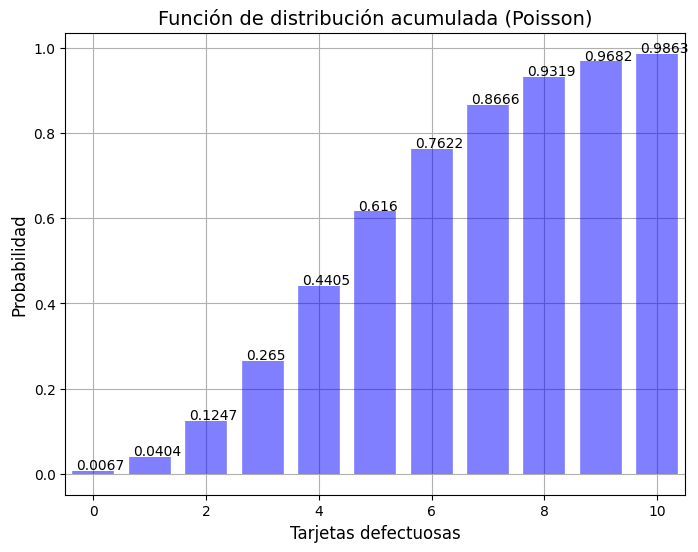

In [10]:
po = poisson.cdf(x,mu)

plt.figure(figsize=(8,6))

plt.title(r"Función de distribución acumulada (Poisson)", fontsize = 14)
plt.xlabel("Tarjetas defectuosas", fontsize = 12)
plt.ylabel("Probabilidad", fontsize = 12)

plt.vlines(x, 0, po, colors = 'b', lw = 30, alpha = 0.5)
for i in x:
  plt.text(x[i]-0.3, po[i]+0.003, round(po[i], 4))
plt.grid(True)
plt.show()

Las gráficas nos ayudan a visualizar y calcular los resultados. Vamos a generar la función de masa o función de probabilidad para un valor de $\mu=5$ en un rango de $X [0, 10]$:<br><br>

Con apoyo de las gráficas vamos a dar solución a los incisos:<br><br>

1. Existan 4 tarjetas defectuosas.<br><br>

<center>$p(4; 5)≈0.1755$</center><br><br>

2. Haya entre 5 y 8 tarjetas defectuosas.<br><br>

<center>$\sum_{i = 5}^8 p(i; 5)=p(8;5)-\sum_{i = 0}^4 p(i; 5)=0.9319-4405≈0.4914$</center><br><br>

3. Cuando menos 7 estén defectuosas.<br><br>

<center>$p(x≥7;5)=1-\sum_{i = 0}^6 p(i;5)=1-0.7622≈0.2378$</center><br><br>

Los resultados están dentro del rango esperado que es entre 1 y 9. Fuera de él podríamos pensar en alguna anomalía. Por ejemplo, valores por encima de 9 podría suponer que alguna parte del proceso necesita revisión debido a un alta en el número de tarjetas defectuosos o incluso algún tipo de negligencia por parte del personal. El sesgo es ligeramente positivo lo que indica una pequeña cola hacia la derecha de la media. La curtosis positiva indica que la punta es leptocúrtica, es decir, más aguda en comparación con una distribución normal y podemos ver en la gráfica mayor concentración de probabilidad en las colas.
